In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/mateusz/Desktop/dummy_data.csv')

In [4]:
df.head()#output first 5 rows

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


#### Data Wrangling

In [11]:
#output all columns in dataset
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')

In [8]:
print(f'Size of data is {df.size}')
print(f'Amount of columns -- {df.shape[1]}')
print(f'Amount of rows -- {df.shape[0]}')


Size of data is 12000
Amount of columns -- 12
Amount of rows -- 1000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [13]:
#checking for missing values 
df.isna().any()

age             False
gender          False
time_spent      False
platform        False
interests       False
location        False
demographics    False
profession      False
income          False
indebt          False
isHomeOwner     False
Owns_Car        False
dtype: bool

In [15]:
#checking for duplicates
df.duplicated().any()

False

In [17]:
df.rename(columns={'time_spent':'time_spent_in_hours',
                   'income':'Yearly_Salary'},inplace=True)

In [18]:
df.head()

,age,gender,time_spent_in_hours,platform,interests,location,demographics,profession,Yearly_Salary,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [124]:
# Define age group boundaries
bins = [18, 25, 35, 50, 70]

# Labels for each age group
labels = ['Youth', 'Adult', 'Old', 'Seniors']

# Categorize ages into groups and create a new column 'group_of_age'
df['group_of_age'] = pd.cut(df['age'], bins=bins, labels=labels)



In [222]:
#delete columns
df.drop(columns=['Yearly_Salary','indebt',	'isHomeOwner',	'Owns_Car'],inplace=True)

### Data Analysis


##### Question 1 Which gender is most commonly used on the Internet

In [39]:
total_hours_by_gender=df.groupby(by='gender')['time_spent_in_hours'].agg(['sum','mean']).reset_index()
total_hours_by_gender

,gender,sum,mean
0,female,1718,5.190332
1,male,1625,4.821958
2,non-binary,1686,5.078313


/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_85911/2525668264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender',y='sum',data=total_hours_by_gender,palette = "pastel",ax=ax1)
/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_85911/2525668264.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='mean', data=total_hours_by_gender, palette='pastel', ax=ax2)


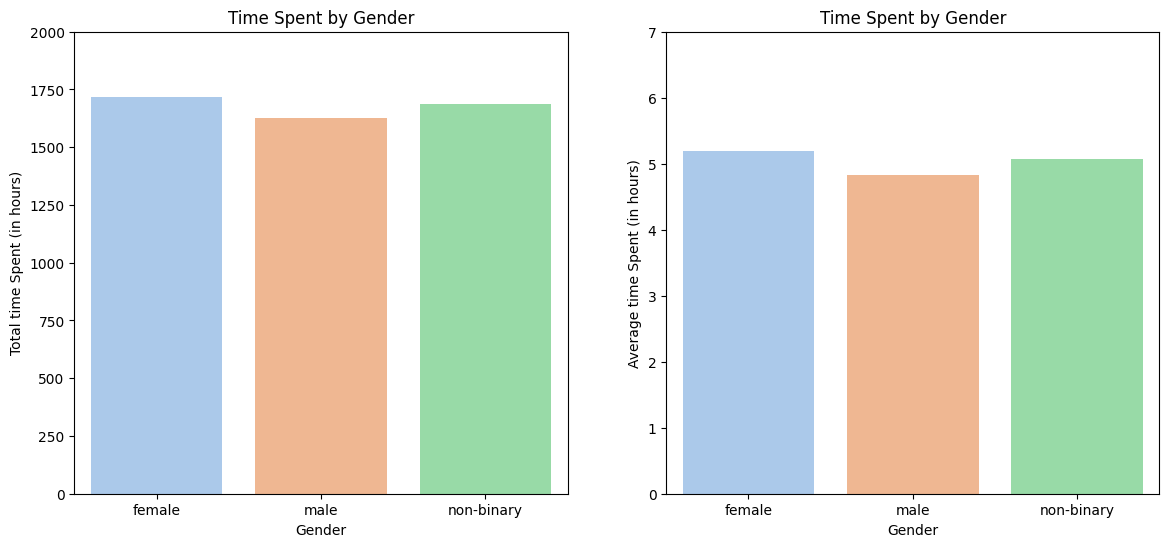

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='gender',y='sum',data=total_hours_by_gender,palette = "pastel",ax=ax1)
ax1.set_ylim(0, 2000)# set the range on  the y-line
ax1.set_xlabel('Gender')# create a title for x-line 
ax1.set_ylabel('Total time Spent (in hours)')
ax1.set_title('Time Spent by Gender')

#create a bar plot 
sns.barplot(x='gender', y='mean', data=total_hours_by_gender, palette='pastel', ax=ax2)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Average time Spent (in hours)')
ax2.set_title('Time Spent by Gender')
ax2.set_ylim(0,7)



plt.show()

##### Question 2.  Which social media the most popular 

In [68]:
best_platyforms=df.groupby(by='platform')['time_spent_in_hours'].sum().reset_index()
best_platyforms

,platform,time_spent_in_hours
0,Facebook,1552
1,Instagram,1870
2,YouTube,1607


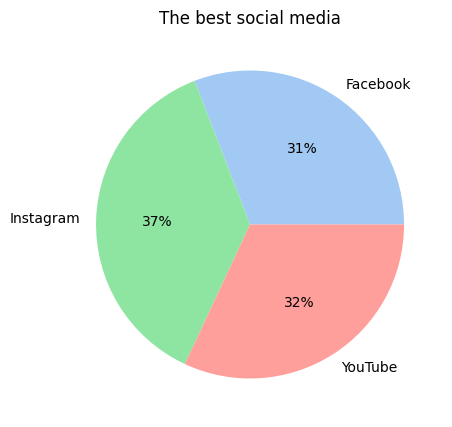

In [78]:
#create a figure for pie chart
plt.figure(figsize=(10,5))
colors=sns.color_palette('pastel6')[0:3]

plt.pie(x=best_platyforms['time_spent_in_hours'],labels=best_platyforms['platform'],autopct='%.0f%%',colors=colors)
plt.title('The best social media')
plt.show()

##### Question 3. Most popular hobby by gender

In [119]:
interests_by_female=df.loc[df['gender'] == 'female'].groupby(by='interests')['time_spent_in_hours'].sum().reset_index()
interests_by_male=df.loc[df['gender'] == 'female'].groupby(by='interests')['time_spent_in_hours'].sum().reset_index()


In [88]:
interests_by_female

,interests,time_spent_in_hours
0,Lifestlye,663
1,Sports,550
2,Travel,505


/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_85911/1463159645.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='interests',y='time_spent_in_hours',data=interests_by_female,palette =colors,ax=ax1)
/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_85911/1463159645.py:4: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x='interests',y='time_spent_in_hours',data=interests_by_female,palette =colors,ax=ax1)
/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_85911/1463159645.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='interests',y='time_spent_in_hours',data=interests_by_male,palette =colors,a

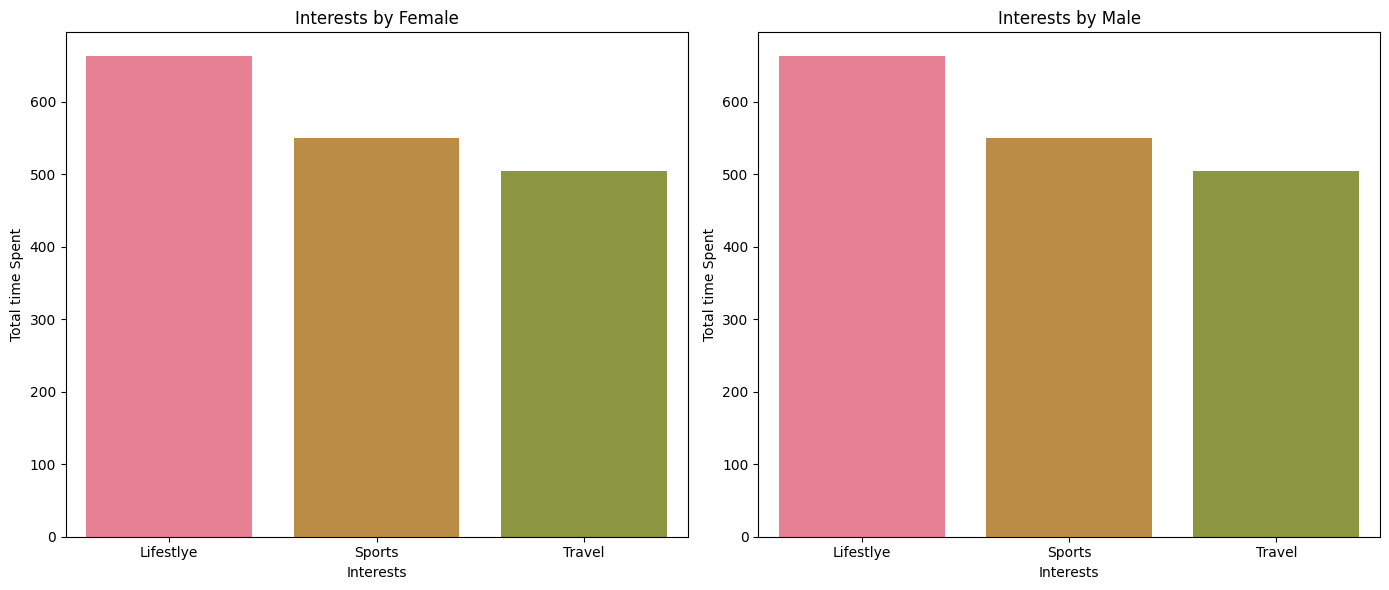

In [118]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

colors=sns.color_palette("husl", 8)
sns.barplot(x='interests',y='time_spent_in_hours',data=interests_by_female,palette =colors,ax=ax1)
ax1.set_xlabel('Interests')
ax1.set_ylabel('Total time Spent')
ax1.set_title('Interests by Female')

sns.barplot(x='interests',y='time_spent_in_hours',data=interests_by_male,palette =colors,ax=ax2)
ax2.set_xlabel('Interests')
ax2.set_ylabel('Total time Spent')
ax2.set_title('Interests by Male')

plt.tight_layout()

plt.show()


##### Question 4. Which group of age spend most hours in social media


In [120]:
df.head()

,age,gender,time_spent_in_hours,platform,interests,location,demographics,profession,Yearly_Salary,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [129]:
group_od_age=df.groupby(by='group_of_age')['time_spent_in_hours'].sum().reset_index()
group_od_age

,group_of_age,time_spent_in_hours
0,Youth,790
1,Adult,933
2,Old,1770
3,Seniors,1405


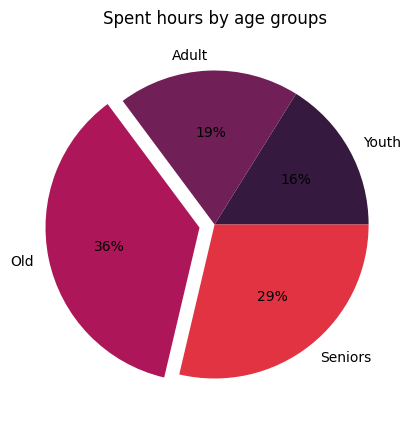

In [138]:
plt.figure(figsize=(10,5))
colors=sns.color_palette("rocket")

plt.pie(x=group_od_age['time_spent_in_hours'],labels=group_od_age['group_of_age'],autopct='%.0f%%',colors=colors,explode=[0,0,0.1,0])
plt.title('Spent hours by age groups')
plt.show()

##### Question 5. Where the most spend time in media UK or USA

In [194]:
most_gours_by_lacations=df.loc[df['location'].isin(['United Kingdom','United States'])].groupby(by=['location','platform'])['time_spent_in_hours'].sum().unstack()


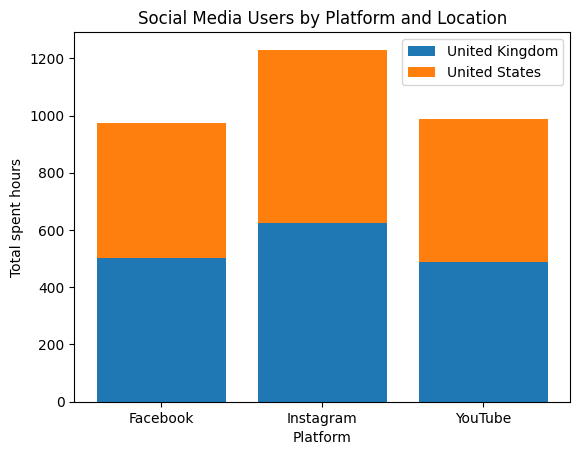

In [195]:
fig, ax = plt.subplots()

# Stacked bar chart
bottom = None
for location in most_gours_by_lacations.index:
    ax.bar(most_gours_by_lacations.columns, most_gours_by_lacations.loc[location], label=location, bottom=bottom)
    if bottom is None:
        bottom = most_gours_by_lacations.loc[location].values
    else:
        bottom += most_gours_by_lacations.loc[location].values

# Add labels and title
ax.set_ylabel('Total spent hours')
ax.set_xlabel('Platform')
ax.set_title('Social Media Users by Platform and Location')

ax.legend()


##### Question 6. Which platform more popular for students 

In [196]:
df.head()

,age,gender,time_spent_in_hours,platform,interests,location,demographics,profession,Yearly_Salary,indebt,isHomeOwner,Owns_Car,group_of_age
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False,Seniors
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True,Old
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False,Adult
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False,Seniors
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True,Youth


In [206]:
popular_platform_for_students=df.loc[df['profession'] == 'Student'].groupby(by='platform').agg(total=('age','count')).reset_index()
popular_platform_for_students

,platform,total
0,Facebook,103
1,Instagram,107
2,YouTube,99


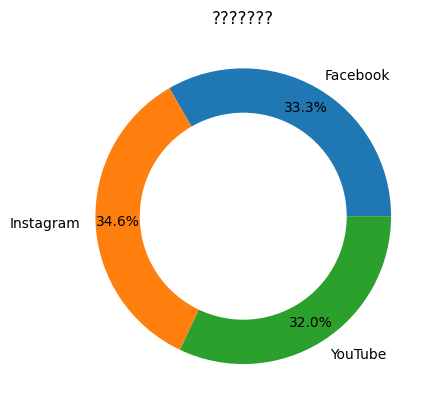

In [217]:
ig, ax = plt.subplots()


wedges, texts, autotexts = ax.pie(popular_platform_for_students['total'], labels=popular_platform_for_students['platform'], autopct='%1.1f%%', wedgeprops=dict(width=0.3),pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('???????')
plt.show()

##### Question 7.

In [223]:
df.head()

,age,gender,time_spent_in_hours,platform,interests,location,demographics,profession,group_of_age
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,Seniors
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,Old
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,Adult
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,Seniors
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,Youth


In [240]:
group_of_age_by_demographics=df.groupby(by=['demographics','group_of_age'])['age'].count().unstack()
group_of_age_by_demographics

group_of_age,Youth,Adult,Old,Seniors
demographics,,,,
Rural,58,59,125,91
Sub_Urban,48,70,108,101
Urban,46,63,109,97


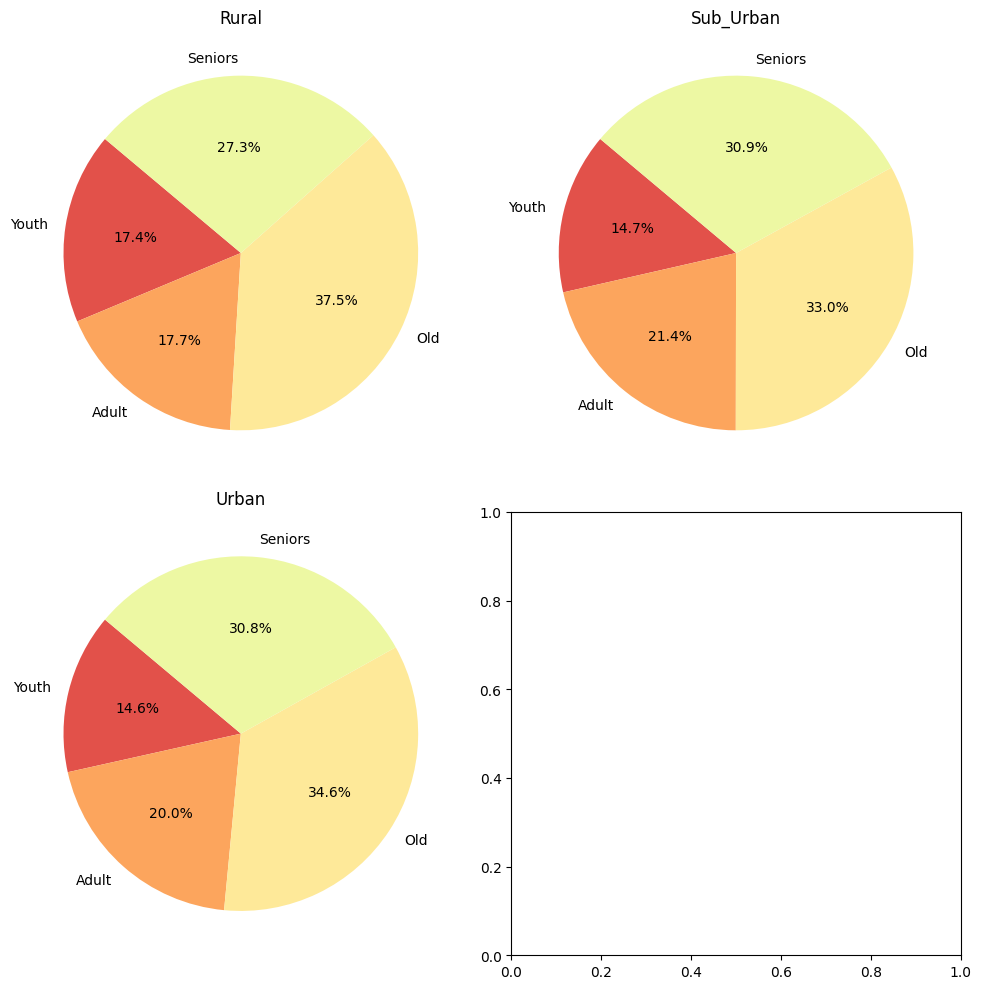

In [254]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
colors=sns.color_palette("Spectral")
for i, (demographic, data) in enumerate(group_of_age_by_demographics.items()):
    axes[i].pie(data, labels=group_of_age_by_demographics.index, autopct='%1.1f%%', startangle=140,colors=colors)
    axes[i].set_title(demographic)

plt.tight_layout()
plt.show()
